<a href="https://colab.research.google.com/github/arnavraj9577/arnavraj9577/blob/main/Bivariation_normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Animate bivariation normal distribution.**
           
      
The Gaussian distribution(or normal distribution) is one of the most fundamental probability distributions in nature. From its occurrence in daily life to its applications in statistical learning techniques, it is one of the most profound mathematical discoveries ever made. This article will ahead towards the multi-dimensional distribution and get an intuitive understanding of the bivariate normal distribution.

The benefit of covering the bivariate distribution is that we can visually see and understand using appropriate geometric plots. Moreover, the same concepts learned through the bivariate distribution can be extended to any number of dimensions. We’ll first briefly cover the theoretical aspects of the distribution and do an exhaustive analysis of the various aspects of it, like the covariance matrix and the density function in Python!

The main function used in this article is the `scipy.stats.multivariate_normal` function from the Scipy utility for a `multivariate_normal`.

We will start our code sessions with the standard `jax`, `matplotlib` and `scipy`  imports. we are using `%matplotlib` for animation in graph. 



In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random
from scipy.stats import multivariate_normal
from jax import scipy
import jax.scipy.stats.beta as jssb
from jax.scipy.linalg import cholesky
from jax.numpy import angle
import numpy as np
from matplotlib.patches import Ellipse
from jax.numpy import zeros
from jax.numpy import size
%matplotlib

Using matplotlib backend: agg


#**Define limits of plotting**

We define the limits of plotting the `matplotlib` graps as `X` and `Y`.

In [2]:
X = jnp.array([-5,0.1,5])
Y = jnp.array([-5,0.1,5])

#**2-d Mean and covariance matrix**

In the following code snippets we’ll be generating Gaussian bivariate distributions with `mean` `[0,0]` and with `covariance` `[1, 0.6]`,` [0.6, 2]` 

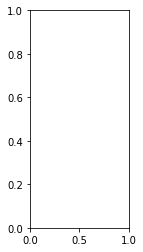

In [3]:
mean = jnp.array([0,0])
cov_val =[0.6] 
for idx, val in enumerate(cov_val):
  plt.subplot(1,3,idx+1)
  cov = jnp.array([[1, val], [val, 2]])


**Probability Density Function(or density function or PDF) of a Bivariate Gaussian distribution**

The density function describes the relative likelihood of a random variable X     at a given sample. If the value is high around a given sample, that means that the random variable will most probably take on that value when sampled at random. Usin function `jax.scipy.stats.beta` for `pdf`.

In [4]:
  Z_x = jssb.pdf(X, mean[1], jnp.sqrt(cov[1,1]))
  Z_y = jssb.pdf(Y, mean[2], jnp.sqrt(cov[1,1]))

**Get the 2-d samples for the "floor"**

Here we are doing our calculation getting our samples for the floor by using `multivariate_normal` of `scipy.stats`.We can also use here jax module code also for multivariate `jax.random.multivariate_normal`.

In [5]:
  Samples = multivariate_normal(mean = mean,cov = cov,seed = 1000)
  data = Samples.rvs(size= 10000)
  

**Get the sigma ellipses by transform a circle by the cholesky decomposition**

Here we are using `cholesky` function to transform a circle in ellipse by using the `jax.scipy.linalg` function of `jax` module also here we are using `linspace`function and `matmul`function of the module.

In [6]:
  L= cholesky(cov, lower = True)
  t = jnp.linspace(0, 2*np.pi, 100)
  C = jnp.array([jnp.cos(t), jnp.sin(t)])
  E1= 1*jnp.matmul(L,C); E2 = 2*jnp.matmul(L,C);E3 = 3*jnp.matmul(L,C)



**Plot the samples and the pdf in 3d form**

Here we are using `plt.figure` function for plotting the figure `plt.axes` for plotting the 3d axes `plt.plot` for the plotting the line graph `ax.hist` for plotting the histogram `plt.contourf` for plotting the contour using `plt.xlabel` and `plt.ylabel`and using `plt.title` for giving the title of the graph.

Text(0.5, 0, 'y')

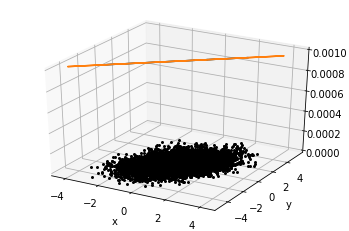

In [7]:
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  plt.plot(data[:,0],data[:,1],'.',c = 'k',markeredgewidth = 0, markeredgecolor = 'black')
  #ax.plot(E1[1,:], E1[2,:], zs=1e-3+0,zdir = 'z', label = 'curve in (x,y)')
  ax.plot(E2[1,:], E2[2,:], zs=1e-3+0,zdir = 'z', label = 'curve in (x,y)')
  plt.plot(E3[1,:], E3[2,:], 1e-3+0)
  #ax.hist(data[:,1], bins=20)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title("bivariate normal distribution")
plt.show()
  



**Reference**

https://en.wikipedia.org/wiki/Multivariate_normal_distribution

https://matplotlib.org/

https://in.mathworks.com/

https://jax.readthedocs.io/en/latest/notebooks/quickstart.html

https://en.wikipedia.org/wiki/File:MultivariateNormal.png